Upgrading and implementing new user interface features into our backend analytics of the Fortune500 dataset

###### TWO FEATURES UPDATED

FEATURE ONE
- Implement a user-interface system feature that will generate a plot that details the top (n) Companies by Revenue for each Decade

FEATURE TWO
- Implement a user interface system feature that displays top (n) Companies by Revenue or Profit for specific year (y)


See details below !

##### Import required libraries

In [1]:
import numpy as np # numpy package for heavy numerical computations
import pandas as pd # pandas package for data analysis
import matplotlib.pyplot as plt # visualization library
import seaborn as sns # visualization library
import plotly.express as px
import plotly.graph_objects as go

In [2]:
data = pd.read_csv('fortune500.csv') # Import CSV file as pandas dataframe
data_original = data.copy(deep = True) # Copy of original dataframe

# head of dataset, shape of dataset, dataset information & summary stats (numeric & categorical)
display(data.head(),data.shape,data.info(), data.describe(),data.describe(include=object)) # descriptive statistics and other !

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25500 entries, 0 to 25499
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   25500 non-null  int64  
 1   Rank                   25500 non-null  int64  
 2   Company                25500 non-null  object 
 3   Revenue (in millions)  25500 non-null  float64
 4   Profit (in millions)   25500 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 996.2+ KB


,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


(25500, 5)

None

,Year,Rank,Revenue (in millions)
count,25500.00000,25500.000000,25500.000000
mean,1980.00000,250.499765,4273.329635
std,14.71989,144.339963,11351.884979
min,1955.00000,1.000000,49.700000
25%,1967.00000,125.750000,362.300000
50%,1980.00000,250.500000,1019.000000
75%,1993.00000,375.250000,3871.000000
max,2005.00000,500.000000,288189.000000


,Company,Profit (in millions)
count,25500,25500
unique,1887,6977
top,CBS,N.A.
freq,57,369


### Data Cleaning
- Explicit data type conversion using Python Casting
- Managing NA (null values) Profit column

In [3]:
print("Column-data-type-check", data['Profit (in millions)'].dtypes) # check data type prior to the type casting
data.loc[data['Profit (in millions)'] == 'N.A.', 'Profit (in millions)'] = 0 # Converting 'N.A.' to zero
#
data['Profit (in millions)'] = data['Profit (in millions)'].astype('float') # Data Type Conversion
print("Column-data-type-check",data['Profit (in millions)'].dtypes) # check data type prior to the type casting

#Missing Values
data_nullity = data.isnull()
#Total Missing Values
data_nullity.sum()

Column-data-type-check object
Column-data-type-check float64


Year                     0
Rank                     0
Company                  0
Revenue (in millions)    0
Profit (in millions)     0
dtype: int64

# Implement a user-interface system feature that will generate a plot that details the top (n) Companies by Revenue for each Decade 

Top(n) companies refers to random number decided by application user

Example: Top 5 for 1950-1959, 1960-1969 etc. 

NOTE: We can see from our above stats that the year range for this dataset ranges from 1955 - 2005 

We will use a single plot from the Matplotlib library:

- Isolate specific timeframes
- Groupby Company and aggragate sum of the Revenue Column for each individual specific timeframe
- Sort in descending order by (Revenue) which after the above groupby/aggregation will = sum column
- Isolate top (n) companies
- Reset index from Company to zero indexing ( otherwise problems will arise generating plot with Company on xaxis .(I have trialed this and issues arose. My solution was reseting index) )

###### Isolate Timeframes
We will isolate timeframes and save them into new variables. These will act as almost new and seperate dataframes.

NOTE

When working with Numpy and using logical operators we use np.logical followed by the logical operator we wish to implement. This is because Numpy array are different to Pythons in built data structures which do not require np.logical keyword !

In [4]:
#.loc to Isolate by specific timeframe ie. decade
n_50s = data.loc[data['Year'] <= 1959] # pandas.DataFrame.loc [] is a property that is used to access a group of rows and columns by label (s) or a boolean array.
n_60s = data[np.logical_and(data['Year'] > 1959, data['Year'] <= 1969)] # np.logical_and() function (Numpy logical operator)
n_70s = data[np.logical_and(data['Year'] > 1969, data['Year'] <= 1979)]
n_80s = data[np.logical_and(data['Year'] > 1979, data['Year'] <= 1989)]
n_90s = data[np.logical_and(data['Year'] > 1989, data['Year'] <= 1999)]
n_00s = data.loc[data['Year'] > 1999 ]

###### User interface System
Below we will build our suer interface system into our code enabling the user to choose the number of top Companies by Revenue for the particular timeframe they wish to visualize

NOTE

We must use python type casting which is a constructur method (OOP) which allows to change the data type

Group by

We will use the group by method with the aggregation method (sum), which will group by the same names in the Company column and sum (aggregate) all the data in the Revenue column. This will give us the total revenue for each individual Company for this particular timeframe.

In [5]:
print("INSTRUCTIONS")
print("Please select a number between zero and ten to choose how many top Companies based on Revenue per decade you wish to visualize: ", end = "")
print("For best visualization the recommended range is between 5 and 7")
num = input()
num = int(num) # int() data type casting
print(type(num)) # check explicit type conversion

# Timeframe 50s
n_50s = n_50s.groupby(['Company'])['Revenue (in millions)'].agg([sum]) # Groupby & aggregation method (Revenue ((SUM) = total revenue)
n_50s = n_50s.sort_values('sum', ascending = False) # sort values by (sum = total revenue)
n_50s = n_50s.head(num) # save head which = top 5 per this timeframe
y_50s = n_50s.reset_index() # reset index from company to zero indexing

# Timeframe 60s
n_60s = n_60s.groupby(['Company'])['Revenue (in millions)'].agg([sum])
n_60s = n_60s.sort_values('sum', ascending = False)
n_60s = n_60s.head(num)
y_60s = n_60s.reset_index()

# Timeframe 70s
n_70s = n_70s.groupby(['Company'])['Revenue (in millions)'].agg([sum])
n_70s = n_70s.sort_values('sum', ascending = False)
n_70s = n_70s.head(num)
y_70s = n_70s.reset_index()

# Timeframe 80s
n_80s = n_80s.groupby(['Company'])['Revenue (in millions)'].agg([sum])
n_80s = n_80s.sort_values('sum', ascending = False)
n_80s = n_80s.head(num)
y_80s = n_80s.reset_index()

# Timeframe 90s
n_90s = n_90s.groupby(['Company'])['Revenue (in millions)'].agg([sum])
n_90s = n_90s.sort_values('sum', ascending = False)
n_90s = n_90s.head(num)
y_90s = n_90s.reset_index()

# Timeframe 00s
n_00s = n_00s.groupby(['Company'])['Revenue (in millions)'].agg([sum])
n_00s = n_00s.sort_values('sum', ascending = False)
n_00s = n_00s.head(num)
y_00s = n_00s.reset_index()

# print output
#print(y_50s, y_60s, y_70s, y_80s, y_90s, y_00s)

INSTRUCTIONS
Please select a number between zero and ten to choose how many top Companies based on Revenue per decade you wish to visualize: For best visualization the recommended range is between 5 and 7
5
<class 'int'>


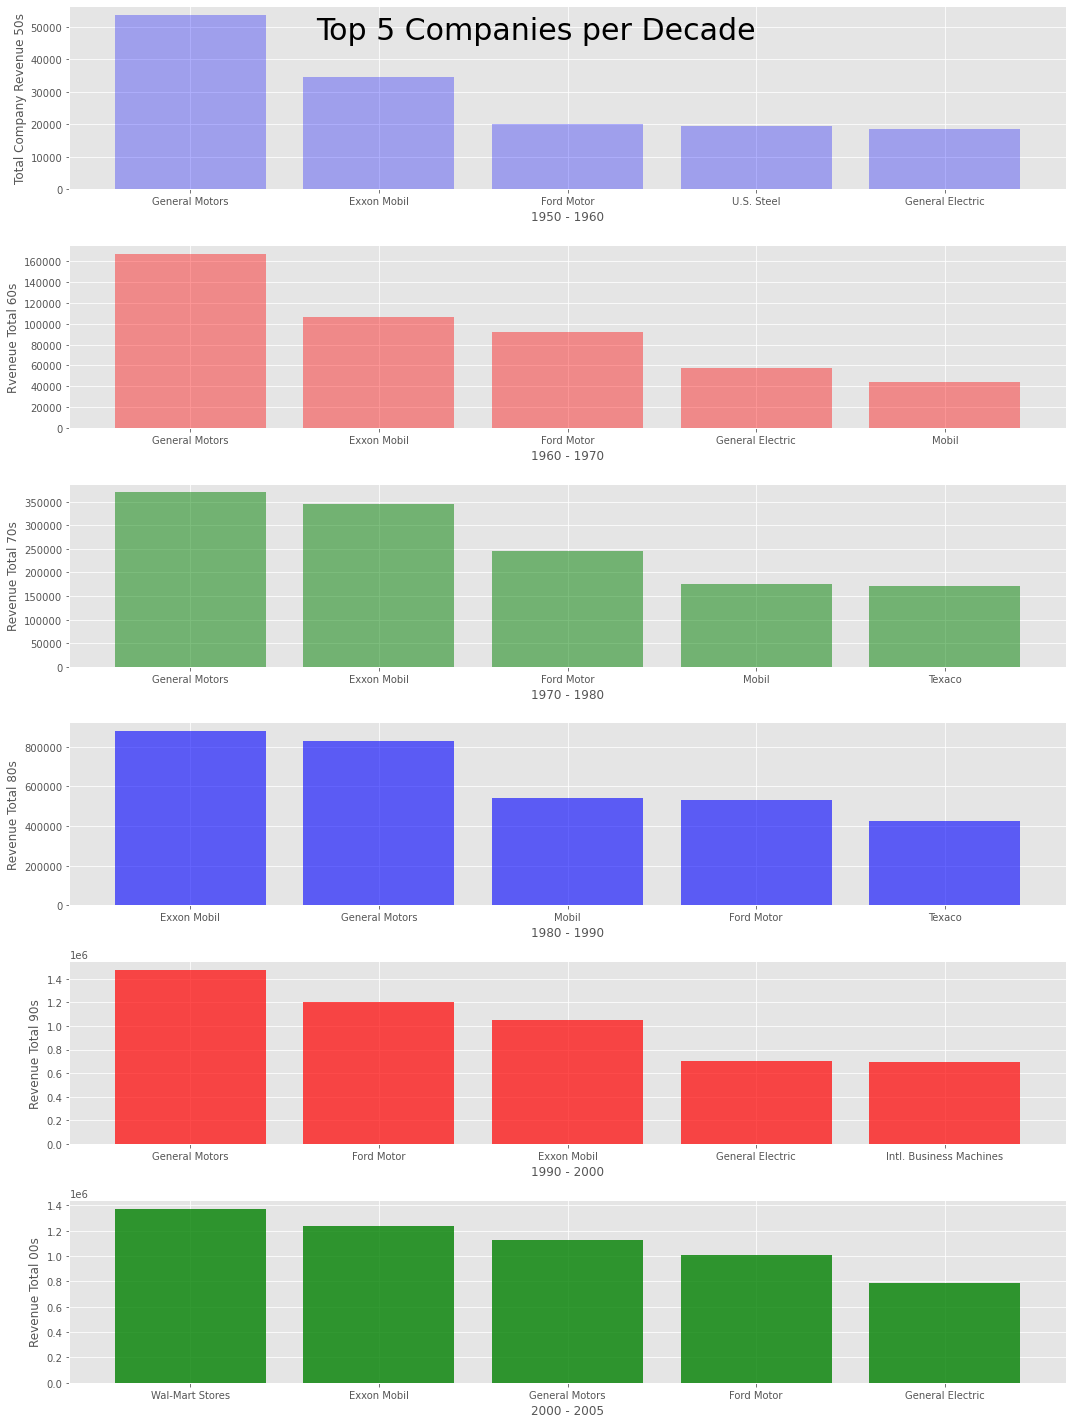

In [6]:
#Generate Bar Plots (Subplots)
plt.style.use('ggplot')
fig, ax = plt.subplots(6, figsize = (15,20), sharey= False)
fig.suptitle('Top {} Companies per Decade'.format(num), fontsize = 30)

#
ax[0].bar(y_50s['Company'], y_50s['sum'],color = 'b', alpha = 0.3)
ax[1].bar(y_60s['Company'], y_60s['sum'], color = 'r', alpha = 0.4)
ax[2].bar(y_70s['Company'], y_70s['sum'], color = 'g', alpha = 0.5)
ax[3].bar(y_80s['Company'], y_80s['sum'], color = 'b', alpha = 0.6)
ax[4].bar(y_90s['Company'], y_90s['sum'], color = 'r', alpha = 0.7)
ax[5].bar(y_00s['Company'], y_00s['sum'], color = 'g', alpha = 0.8)

#Set xlabe;s
ax[0].set_xlabel('1950 - 1960')
ax[1].set_xlabel('1960 - 1970')
ax[2].set_xlabel('1970 - 1980')
ax[3].set_xlabel('1980 - 1990')
ax[4].set_xlabel('1990 - 2000')
ax[5].set_xlabel('2000 - 2005')

#set y labels
ax[0].set_ylabel('Total Company Revenue 50s')
ax[1].set_ylabel('Rveneue Total 60s')
ax[2].set_ylabel('Revenue Total 70s')
ax[3].set_ylabel('Revenue Total 80s')
ax[4].set_ylabel('Revenue Total 90s')
ax[5].set_ylabel('Revenue Total 00s')

#Set spacing
fig.tight_layout()
plt.show()

# Implement a user interface system feature that displays top (n) Companies by Revenue or Profit for specific year (y)

In [7]:
#
print("INSTRUCTIONS-Year-Selection")
print("Please select a Year: ", end = "")
print("Remember: dataset ranges from 1955 - 2005 ")
print("Year format must ex. 1995 : xxxx")
year = input()
year = int(year) # int() data type casting

#
print("INSTRUCTIONS-Number-of-COMPANIES")
print("Please select (n) number for Companies: ", end = "")
print("Recommendation for best visualizations between 8 - 14")
n_comp = input()
n_comp = int(n_comp) # int() data type casting

#
print("INSTRUCTIONS-Feature-Selection")
print("Please select (feature): ", end = "")
print("Revenue'or'Profit")
feature = input()


#
#Subsetting to Isolate year 
yr = data.loc[data['Year'] == year]
#sort first by revenue and second profit
yr = yr.sort_values(['Revenue (in millions)','Profit (in millions)'], ascending = False)
#Isolating by top 20 companies
yr = yr.head(n_comp)
#yr

INSTRUCTIONS-Year-Selection
Please select a Year: Remember: dataset ranges from 1955 - 2005 
Year format must ex. 1995 : xxxx
2001
INSTRUCTIONS-Number-of-COMPANIES
Please select (n) number for Companies: Recommendation for best visualizations between 8 - 14
10
INSTRUCTIONS-Feature-Selection
Please select (feature): Revenue'or'Profit
Profit


In [9]:
if feature == 'Revenue':
    #
    if n_comp <= 5:
        # pie chart
        fig = px.pie(yr, values='Revenue (in millions)', names= yr['Company'],
                     title='Revenue Distribution per Top {} Company (1971)'.format(n_comp))
        fig.update_layout(title_font_size = 28, title_font_color = 'black', legend_font_size = 22)
        fig.show()
    #
    else:
        #Enter Cat/Line-Plot (User choice)
        print('Please choose visualization type ((cat) cat plot / (line) Pie Chart) :', end = ' ')
        Graphic = input()
        #
        if Graphic == 'cat':
            #Catplot/Bar-plot
            sns.set_style('darkgrid')
            sns.catplot(y = 'Company', x = 'Revenue (in millions)', data = yr, kind = 'bar') 
            plt.xticks(rotation = 0)
            plt.show()
        else:
            #Plotly Bar Plot
            fig = px.line(yr, x='Company', y='Revenue (in millions)', hover_data = ['Profit (in millions)'])
            # Edit the layout
            fig.update_layout(title='Revenue Distribution per Top {} Company {}'.format(n_comp,year),
                              xaxis_title='Company',
                              yaxis_title='Profit (in millions)', 
                              template = 'simple_white')
            fig.show()   
            
else:
    #
    if n_comp <= 5:
        # pie chart
        fig = px.pie(yr, values='Profit (in millions)', names= yr['Company'],
                     title='Profit Distribution per Top {} Company (1971)'.format(n_comp))
        fig.update_layout(title_font_size = 28, title_font_color = 'black', legend_font_size = 22)
        fig.show()
    #
    else:
        #Enter Cat/Line-Plot (User choice)
        print('Please choose visualization type ((cat) cat plot / (line) Pie Chart) :', end = ' ')
        Graphic = input()
        #
        if Graphic == 'cat':
            #Catplot/Bar-plot
            sns.set_style('darkgrid')
            sns.catplot(y = 'Company', x = 'Profit (in millions)', data = yr, kind = 'bar') 
            plt.xticks(rotation = 0)
            plt.show()
        else:
            #Plotly Bar Plot
            fig = px.line(yr, x='Company', y='Profit (in millions)', hover_data = ['Revenue (in millions)'])
            # Edit the layout
            fig.update_layout(title='Profit Distribution per Top {} Company {}'.format(n_comp,year),
                              xaxis_title='Company',
                              yaxis_title='Revenue (in millions)', 
                              template = 'simple_white')
            fig.show()   

Please choose visualization type ((cat) cat plot / (line) Pie Chart) : line
